# Tabular models

In [49]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [50]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [51]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [52]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [53]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(num_workers = 0))

In [54]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,False,1.2030,1.9640,-0.0312,<50k
Local-gov,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Black,False,0.5434,1.1992,1.1422,>=50k
Private,9th,Separated,Other-service,Not-in-family,Black,False,0.9831,-0.3410,-1.9869,<50k
Private,HS-grad,Married-civ-spouse,Tech-support,Husband,White,False,-0.7760,-0.7637,-0.4224,<50k
Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,False,0.9831,-1.3912,1.9245,>=50k
Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,False,0.0303,-0.0856,1.5334,>=50k
Private,11th,Never-married,Other-service,Own-child,White,False,-1.5090,-0.1530,-1.2046,<50k
Private,Some-college,Divorced,Craft-repair,Own-child,White,False,0.2502,0.7005,-0.0312,<50k
?,Some-college,Never-married,?,Own-child,White,False,-1.2891,-1.0428,-0.0312,<50k
Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,False,-1.0692,0.2421,1.1422,<50k


In [55]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [56]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.377172,0.380517,0.820000,00:05


In [57]:
learn.show_results()

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target,prediction
Private,Some-college,Divorced,Handlers-cleaners,Unmarried,White,True,0.4701,-0.8793,-0.0312,<50k,<50k
Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,True,0.5434,0.0290,-0.0312,>=50k,>=50k
Private,Assoc-voc,Divorced,#na#,Not-in-family,White,True,-0.1896,1.7704,-0.0312,<50k,<50k
Federal-gov,Bachelors,Never-married,Tech-support,Not-in-family,White,True,-0.9959,-1.3242,-0.0312,<50k,<50k
Private,Bachelors,Married-civ-spouse,#na#,Husband,White,True,-0.1163,-0.2389,-0.0312,<50k,<50k


## Inference

In [ ]:
row = df.iloc[0]

In [ ]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.4402, 0.5598]))

In [10]:
path = Path("")

In [4]:
df.head(4)

,Downloaded,Engagement (Avg Likes),Links,alt-text,caption,followers,following,likes,num_posts,posttime,...,rolling_avg,engagement_factor_moving_avg,date,hour,minute,second,month,year,day_name,performance
0,1.0,NaN,https://www.instagram.com/p/BKo3EVRj5To/,NaN,NaN,129270,1341,NaN,2584,NaN,...,2760.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,https://www.instagram.com/p/B5xuUqpBZPb/,NaN,NaN,129270,1341,NaN,2584,NaN,...,2760.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,https://www.instagram.com/p/Belm3PfjAKg/,NaN,NaN,129270,1341,NaN,2584,NaN,...,2760.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,https://www.instagram.com/p/BQnfW-ujX6q/,NaN,NaN,129270,1341,NaN,2584,NaN,...,2760.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = pd.read_csv('Post_Processed.csv')

In [141]:
df = pd.read_csv('Post_Processed.csv')



df = df[df['username'] == 'localhaven']
for name in df.columns:
    if name.startswith('Unnamed'): df.drop(name, axis = 1, inplace = True)
        

dep_var = 'performance'
cat_names = ['year', 
             'day_name', 
             'month',
             'username']
cont_names = ['followers', 
              'following', 
              'num_posts', 
              'rolling_avg', 
              #'minute', 
              #'second',  
              #'date', 
              'hour',
             ]
procs = [FillMissing, Categorify]#, Normalize]


#df = df[~np.isnan(df[dep_var])]
df = df[[isinstance(x, str) for x in df[dep_var]]]
#df = df[df['Downloaded'] == 1]

In [142]:
df

,Downloaded,Engagement (Avg Likes),Links,alt-text,caption,followers,following,likes,num_posts,posttime,...,rolling_avg,engagement_factor_moving_avg,date,hour,minute,second,month,year,day_name,performance
10,1.0,NaN,https://www.instagram.com/p/B6rIiJMBNuK/,Image may contain: food,Yogurt dips always and forever. Labne with Siz...,129270,1341,3003.0,2584,2019-12-29T22:59:01.000Z,...,2580.9500,1.163525,29.0,22.0,59.0,1.0,12.0,2019.0,7.0,High
11,1.0,NaN,https://www.instagram.com/p/BuR4MIuB_1i/,Image may contain: food,Made @basically Chicken and Rice Soup with Gar...,129270,1341,4223.0,2584,2019-02-24T21:18:27.000Z,...,2391.3000,1.765985,24.0,21.0,18.0,27.0,2.0,2019.0,7.0,High
12,1.0,NaN,https://www.instagram.com/p/BgMKji2DXPe/,"Photo by Ashley Marti on March 11, 2018.",golden beet hummus with sesame oil,129270,1341,1610.0,2584,2018-03-11T16:43:59.000Z,...,1423.4000,1.131095,11.0,16.0,43.0,59.0,3.0,2018.0,7.0,High
13,1.0,NaN,https://www.instagram.com/p/Bc_EitTjWl5/,"Photo shared by Ashley Marti on December 21, 2...",Taking a break from all of the holiday cookies...,129270,1341,1191.0,2584,2017-12-22T01:07:08.000Z,...,1455.5000,0.818276,22.0,1.0,7.0,8.0,12.0,2017.0,5.0,Low
14,1.0,NaN,https://www.instagram.com/p/BTWasLfDfN4/,Photo by Ashley Marti in Elder Hall with @will...,PORTLAND #giveaway! Enter to win a seat at the...,129270,1341,1525.0,2584,2017-04-26T13:29:15.000Z,...,1562.1000,0.976250,26.0,13.0,29.0,15.0,4.0,2017.0,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,NaN,NaN,https://www.instagram.com/p/BzBn9NFBxkK/,"Image may contain: plant, table and indoor","Home after ten on the road, and back with some...",129270,1341,935.0,2584,2019-06-22T20:25:44.000Z,...,2632.3500,0.355196,22.0,20.0,25.0,44.0,6.0,2019.0,6.0,Low
944,NaN,NaN,https://www.instagram.com/p/Bmt5A0UDpHl/,"Photo by Ashley Marti in White Salmon, Washing...","Plums, shaved fennel, champagne vinegar, olive...",129270,1341,913.0,2584,2018-08-20T22:13:14.000Z,...,1608.0500,0.567768,20.0,22.0,13.0,14.0,8.0,2018.0,1.0,Low
945,NaN,NaN,https://www.instagram.com/p/BrI5aWVh3Hr/,Image may contain: food,Peppermint Bark Chocolate Donuts and a #giveaw...,129270,1341,1575.0,2584,2018-12-08T20:01:47.000Z,...,2633.1500,0.598143,8.0,20.0,1.0,47.0,12.0,2018.0,6.0,Low
946,NaN,NaN,https://www.instagram.com/p/BeyzqwZDFXG/,Image may contain: 1 person,"guacamole, always!",129270,1341,1550.0,2584,2018-02-04T23:51:35.000Z,...,1857.4375,0.834483,4.0,23.0,51.0,35.0,2.0,2018.0,7.0,Low


In [143]:
data = (TabularList.from_df(df, path = path, cat_names = cat_names, cont_names = cont_names, procs = procs)
        .split_by_rand_pct()
        .label_from_df(cols = dep_var)
        .databunch(num_workers = 0)
       )

In [144]:
learn = tabular_learner(data, layers = [10000,500, 100], metrics=[accuracy])

In [145]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\William\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


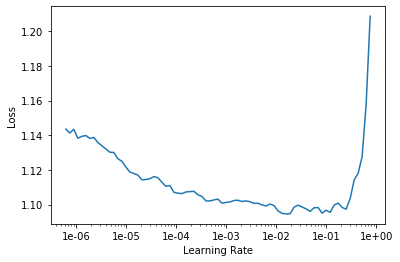

In [146]:
learn.lr_find()
learn.recorder.plot()

In [147]:
learn.fit_one_cycle(10, max_lr = 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,1.122678,81.063469,0.383784,00:00
1,1.093287,190.780930,0.232432,00:00
2,1.104451,84.882965,0.383784,00:00
3,1.092844,65.658066,0.383784,00:00
4,1.076516,107.216110,0.383784,00:00
5,1.064922,28.370913,0.383784,00:00
6,1.055507,54.090656,0.383784,00:00
7,1.043066,54.253811,0.383784,00:00
8,1.030594,52.482967,0.383784,00:00
9,1.017302,40.674309,0.383784,00:00


In [148]:
learn.show_results(10)

year,day_name,month,username,followers,following,num_posts,rolling_avg,hour,target,prediction
2019.0,7.0,12.0,localhaven,129270.0000,1341.0000,2584.0000,2580.9500,22.0000,High,High
2019.0,7.0,2.0,localhaven,129270.0000,1341.0000,2584.0000,2391.3000,21.0000,High,High
2018.0,7.0,3.0,localhaven,129270.0000,1341.0000,2584.0000,1423.4000,16.0000,High,High
2018.0,5.0,3.0,localhaven,129270.0000,1341.0000,2584.0000,1379.1500,21.0000,High,High
2018.0,3.0,9.0,localhaven,129270.0000,1341.0000,2584.0000,1631.8500,13.0000,Low,High


In [149]:
result_counter = {'Normal': 0, 'Low':0, 'High':0}
for i, _ in df.iterrows():
    pred = learn.predict(df.iloc[i])[0].obj
    result_counter[pred] += 1
print (f"High: {result_counter['High']}, Med: {result_counter['Normal']}, Low: {result_counter['Low']}")

IndexError: single positional indexer is out-of-bounds

In [ ]:
result_counter